# Librerias

In [145]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Imputacion de datos


In [146]:
pacientes=pd.read_csv('insurance.csv')

# Exploracion de datos

**Atributos**:

1. **Edad**: Edad del paciente
2. **Sexo**: Genero del paciente
3. **IMC**: Indice de masa corporal
4. **Hijos**: NUmero de hijos
5. **Fumador**: Es fumador o no
6. **Region**: Area de residencia del paciente
7. **Gastos_medicos**: Costo facturados por atencion medica

In [147]:
pacientes.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [148]:
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No tenemos valores nulos

In [149]:
pacientes.rename(index=str, columns={'age': 'Edad',
                              'sex': 'Sexo','bmi':'IMC','children':'Hijos','region':'Region', 'smoker':'Fumador', 'charges':'Gastos_medicos'}, inplace=True)

In [150]:
pacientes.head()

,Edad,Sexo,IMC,Hijos,Fumador,Region,Gastos_medicos
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [151]:
pacientes.isnull()

,Edad,Sexo,IMC,Hijos,Fumador,Region,Gastos_medicos
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


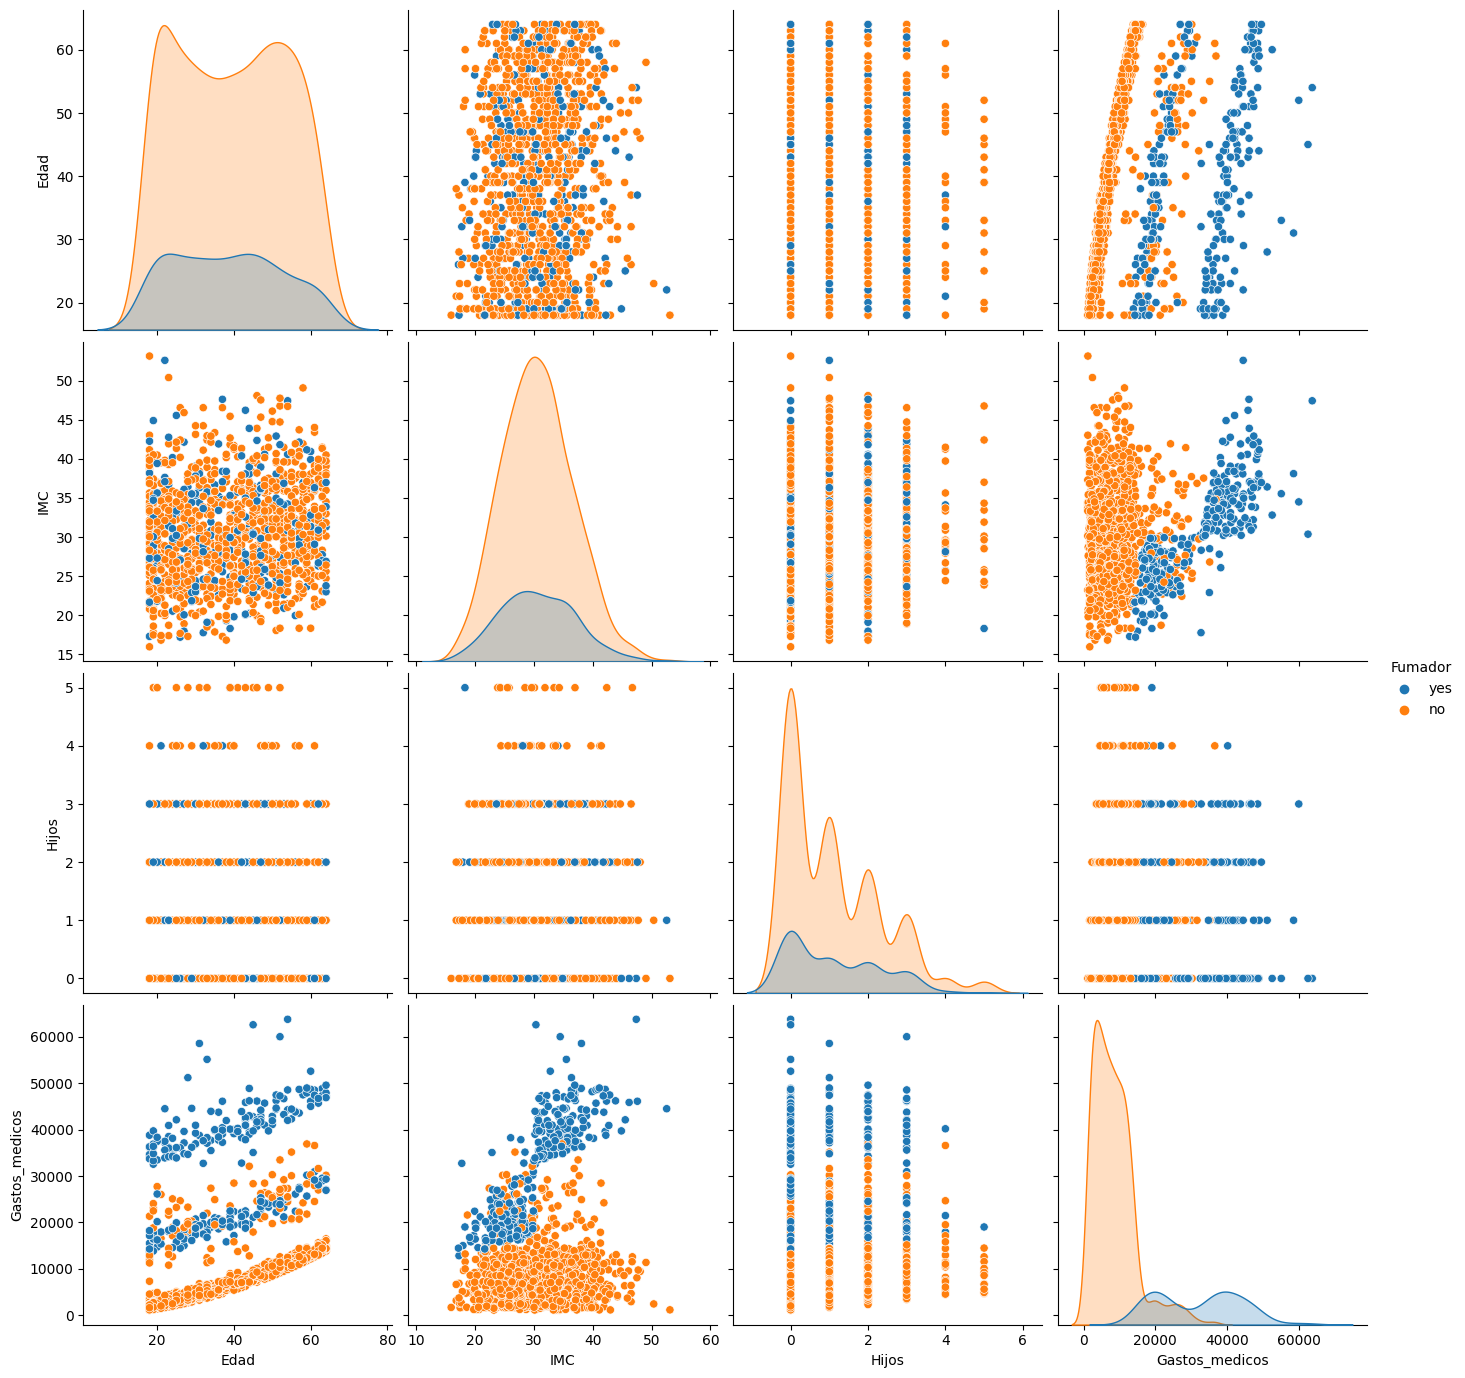

In [132]:
sns.pairplot(pacientes, hue='Fumador',height=3.5)

# Regresion Lineal

Remplazo valores categoricos por numericos para empezar el analisis

In [133]:
from sklearn.preprocessing import LabelEncoder
#Sexo
le = LabelEncoder()
le.fit(pacientes.Sexo.drop_duplicates())
pacientes.Sexo = le.transform(pacientes.Sexo)
# Fumador o  no
le.fit(pacientes.Fumador.drop_duplicates())
pacientes.Fumador = le.transform(pacientes.Fumador)
#Region
le.fit(pacientes.Region.drop_duplicates())
pacientes.Region = le.transform(pacientes.Region)

In [134]:
pacientes.corr()['Gastos_medicos'].sort_values()

Region           -0.006208
Sexo              0.057292
Hijos             0.067998
IMC               0.198341
Edad              0.299008
Fumador           0.787251
Gastos_medicos    1.000000
Name: Gastos_medicos, dtype: float64

<Axes: >

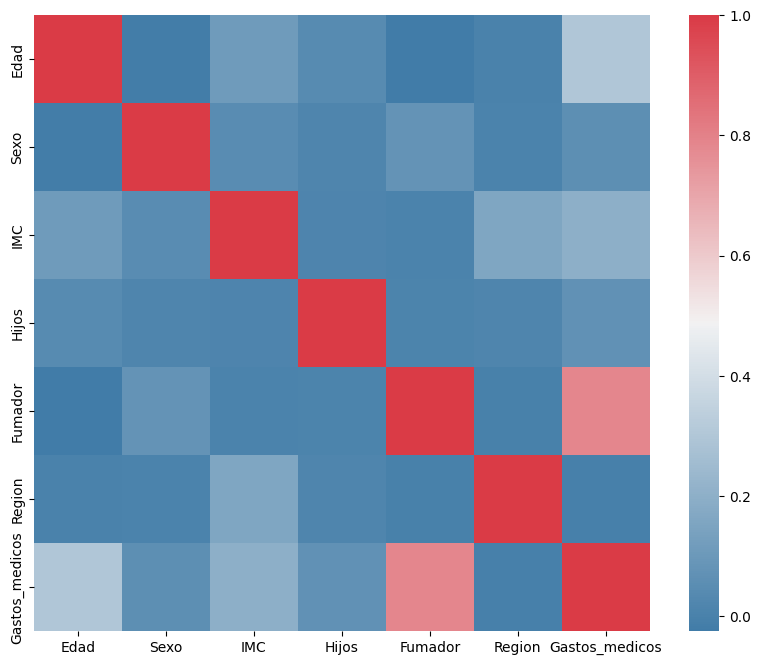

In [135]:
f, ax = plt.subplots(figsize=(10, 8))
corr = pacientes.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(240, 10, as_cmap=True),
            square=True, ax=ax)


Se observa correlacion cuando el paciente es fumador

Text(0.5, 1.0, 'Distribution  non-smokers')

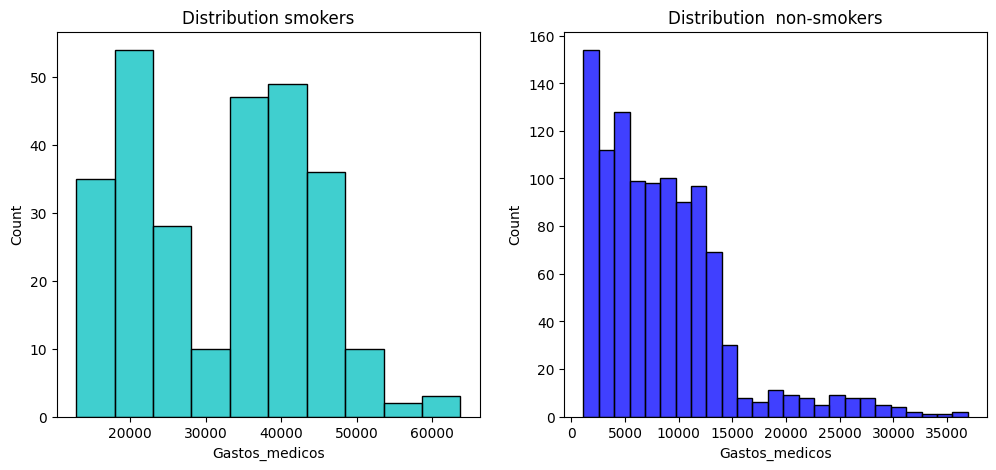

In [136]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.histplot(data=pacientes[pacientes['Fumador'] == 1], x="Gastos_medicos", color='c', ax=ax)
ax.set_title('Distribution smokers')

ax=f.add_subplot(122)
sns.histplot(data=pacientes[pacientes['Fumador'] == 0], x="Gastos_medicos", color='b', ax=ax)
ax.set_title('Distribution  non-smokers')

Los pacientes fumadores muestran mas gastos medicos

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

Regresion Lineal con Sklearn

In [138]:
x = pacientes.drop(['Gastos_medicos'], axis = 1)
y = pacientes.Gastos_medicos

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7962732059725786


In [139]:
X = pacientes.drop(['Gastos_medicos','Region'], axis = 1)
Y = pacientes.Gastos_medicos



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147227


In [140]:
forest = RandomForestRegressor(criterion='squared_error', random_state=1, n_jobs=-1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3746684.434, MSE test data: 19965476.411
R2 train data: 0.974, R2 test data: 0.873


Estos resultados indican que el modelo es adecuado para predecir los costos médicos de los pacientes en función de otras variables del conjunto de datos.

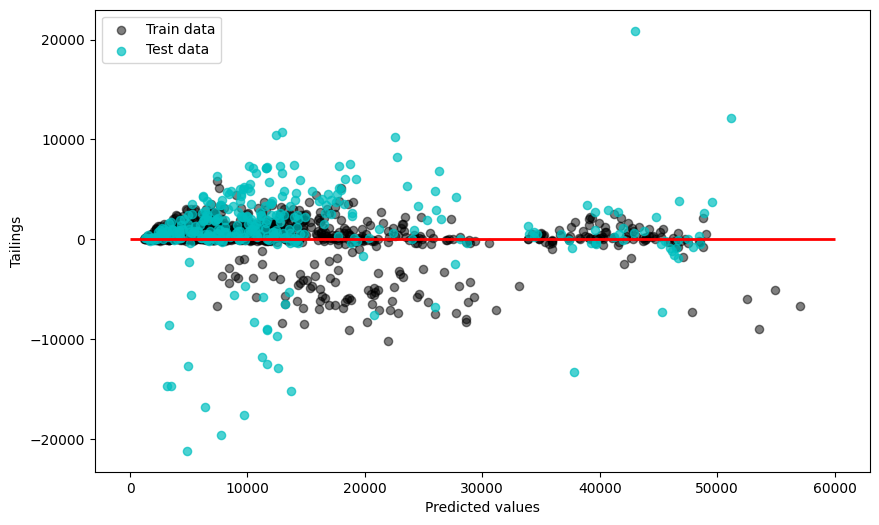

In [141]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

Aumentamos  variables al modelo

In [142]:
# Seleccionamos las variables predictoras (todas excepto la variable objetivo)
X_cols = ['IMC','Fumador','Hijos','Edad']

# Seleccionamos la variable objetivo
y_col = ['Gastos_medicos']


# Separamos los datos en conjuntos de entrenamiento y prueba
X = pacientes[X_cols].values
y = pacientes[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Estandarizamos las variables predictoras y objetivo en ambos conjuntos
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# Creamos y entrenamos el modelo de regresión lineal
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba utilizando nuestro modelo entrenado
y_pred = model.predict(X_test)

print('MAE:', mean_absolute_error(y_test, y_pred).round(4))
print('MSE:', mean_squared_error(y_test, y_pred).round(4))
print('R^2:', r2_score(y_test, y_pred).round(4))

MAE: 0.3542
MSE: 0.244
R^2: 0.7654


In [143]:
model.coef_ = model.coef_.reshape(-1)
y_test = y_test.reshape(-1)

print('='*16,'Summary','='*16)
stats.summary(model, X_test, y_test, X_cols)

================ Summary ================
Residuals:
    Min    1Q  Median    3Q    Max
-1.8958 -0.14  0.0882 0.253 0.8962


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept  0.000000    0.027103   0.0000  1.000000
IMC         0.163448    0.025761   6.3448  0.000000
Fumador     0.792601    0.027134  29.2102  0.000000
Hijos       0.043505    0.026964   1.6134  0.107595
Edad        0.302894    0.027008  11.2149  0.000000
---
R-squared:  0.76537,    Adjusted R-squared:  0.76252
F-statistic: 269.12 on 4 features


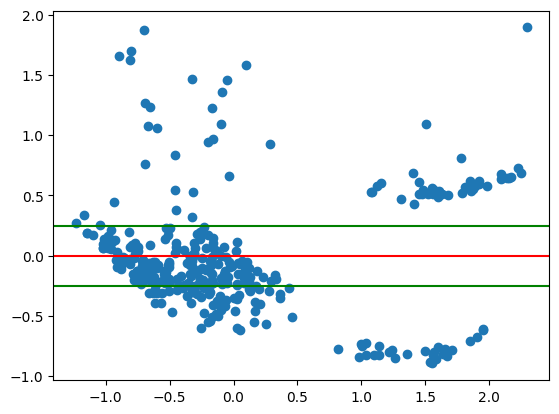

In [144]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(0,0,color='red')
plt.axhline(0.25,0,color='green')
plt.axhline(-0.25,0,color='green')
plt.plot();

Podemos observar que todas nuestras variables son estadísticamente significativas con la variable objetivo, es decir, todas las variables están relacionadas con los cargos médicos y son útiles para hacer predicciones.

# Conclusion

En resumen, los resultados indican una fuerte correlación entre el gasto médico y ciertas características personales, como el tabaquismo, la edad y el índice de masa corporal (IMC). Se observa que los fumadores tienden a gastar más en atención médica en comparación con los no fumadores, y tanto la edad como el IMC también tienen un impacto significativo en los costos médicos. La inclusión de estas variables en un modelo de regresión lineal puede mejorar la capacidad predictiva del modelo y proporcionar información valiosa a los profesionales de la salud para comprender mejor los factores que influyen en el costo de la atención médica.




